# Chapter 21: Minimax Game Strategies: Solve Tic Tac Toe

In this chapter, you’ll learn how minimax algorithms work. You'll use it to play the Tic Tac Toe game that we developed in Chapter 11. The algorithm exhausts all possibilities in the Tic Tac Toe game. The minimax agent plays perfectly: no strategy can beat it. 

We then deploy the game to the online platform replit.com, where you can play against the minimax algorithm. Even if you move first, the best you can do is to force a tie-game. You can never beat the minimax agent (it's mathematically proven!). 

You can play the game live here

https://replit.com/@MarkLiu11/Tic-Tac-Toe-Minimax-Solver?v=1

***
$\mathbf{\text{Create a subfolder for files in Chapter 21}}$<br>
***
We'll put all files in Chapter 21 in a subfolder /files/ch21. Run the code in the cell below to create the subfolder.

***

In [12]:
import os

os.makedirs("files/ch21", exist_ok=True)

## 1. Introduction to the Minimax Algorithm
We'll introduce the minimax algorithm in the section.

### 1.1. What is the Minimax Algorithm?
The minimax algorithm is a decision rule in artificial intelligence and game theory. It's also called MinMax. 

In a nutshell, the algorithm assumes that: 
 
*	Each player in the game makes the best possible decisions at each step;
*	Further, each player knows that other players make fully rational decisions as well;
*	Each players knows that other players know that he/she makes the best possible decisions;
*   and so on...

In a two-player game, each player makes decisions to maximize his/her own expected payoff and to minimize the opponent's payoffs. Hence the name minimax. 

### 1.2. The Minimax Algorithm with Backward Induction
The solution in a minimax algorithm is achieved through backward induction. It starts with the terminal state of the game (in Tic Tac Toe, when the game is tied or when one player has won) and finds out the payoffs to each player in that state. In the second to last stage of the game, the player looks one step ahead and makes the best decision for himself/herself, anticipating that the opponent makes the best decision in the previous stage, and so on.

Let's use the Tic Tac Toe game as the example. Each game has a maximum of 9 stages. In stage 9 (assuming the game is not over by then), player X has only one choice so no decision is needed. In stage 8, player O looks at the two choices and picks the best one for himself/herself. In stage 7, player X picks the best decision, knowing that player O will pick a choice that minimizes player X's payoff in stage 8, and so on. The reasoning goes all the way back to the very first step when player X makes a decision. 

Since the total number of possible scenarios in a Tic Tac Toe game is small (less than $3^9=19,683$), the computer program can exhaust all scenarios in a short amount of time and find the best solution for each player in every stage of the game. 

However, for more complicated games such as Chess and Go, the total number of possible scenarios in a game is astronomical. It's impossible for the minimax algorithm to pick the best move in a reasonable amount of time. We'll discuss how to mitigate this concern in later chapters. One easy mitigating method is to stop searching after a fixed number of stages. For example, you can limit the program to look ahead at most four steps so that the program can recommend a solution in just a few seconds. 

## 2. Implement the Minimax Algorithm in Tic Tac Toe

We'll use the self-made Tic Tac Toe game environment from Chapter 11. Specifically, the module is saved as *TicTacToe_env.py* in the folder *utils* in this GitHub repository. 

First, let's define a couple of functions that the algorithm will use. 

### 2.1. The minimax_X() Function
We'll define a minimax_X() function for the player X. Potentially we can define one function for both players but it's more difficult to explain. There is a tradeoff between coding efficiency and the understandability of the code. So here we choose the latter. 

The function tells the player X what's the best next move, anticipating that player O will make the best decision in the next stage as well, and so on. 

In [ ]:
def minimax_X():
    # to speed up, choose 5 as the very first move
    if env.occupied["X"]==[]:
        return "5"
    # the above two lines of code are not needed except to save time
    wins=[]
    ties=[]
    losses=[]  
    # iterate through all possible next moves
    for m in env.validinputs:
        # make a hypothetical move and see what happens
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m) 
        # If player X wins right away with move m, take it.
        if done and reward==1:
            return m 
        # See what's the best response from the opponent
        opponent_best=best_outcome(env_copy, reward, done)  
        # Opponent's payoff is the opposite of your payoff
        my_payoff=-1*opponent_best 
        if my_payoff==1:
            wins.append(m)
        elif my_payoff==0:
            ties.append(m)
        else:
            losses.append(m)
    # pick winning moves if there is any        
    if wins:
        return choice(wins)
    # otherwise pick tying moves
    if ties:
        return choice(ties)
    return choice(losses)

To speed up the game, we choose Cell 5 as the very first move for player X. If we don't do this, the first move takes 10 to 20 seconds. You can try to delete this part of the code and see what happens.

If it's not the very first move, player X iterates through all possible next moves. Note that we need to use deepcopy here. In Python, when you make a regular copy of an object, you just create a link to the original object. When you make changes to the copy, the original is changed as well. To avoid this, we need to use deepcopy. Many Python beginners make mistakes on this and couldn't figure out what's wrong with their code.


If player X finds a move that allows him/her to win the game right away, player X will stop searching and take the move. Otherwise, player X will see what's the best outcome for player O in the next stage, knowing full well that player O will make the best decision to maximize player O's payoff. Since it's a zero-sum game, payer X's payoff is the opposite of player O's payoff. Player X will then pick winning moves if there is one; otherwise, he/she will pick a typing move; otherwise, player X has no choice but to pick whatever move is left. 

Here, we use the *best_outcome(env_copy, reward, done)* function to find the best payoff for player O in the next stage. Let's define that function next.   

***
$\mathbf{\text{Deepcopy in Python}}$<br>
***
In Python, when you make a regular copy of an object, you just create a link to the original object. When you make changes on the copy, the original is changed as well. To avoid this, we need to use deepcopy when we make hypothetical game moves. Many Python beginners make mistakes on this and couldn't figure out what's wrong with their code.

***

### 2.2. The *best_outcome()* Function 
Next, we'll define *best_outcome(env, reward, done)* function. This function produces the best possible outcome for the next player in the next stage of the game. Note this function applies to any stage of the game so we don't need to define one for player X and one for player O.

In [1]:
def best_outcome(env, reward, done):
    # if the game has ended after the previous player's move, calculate the payoffs
    if done:
        # if the previous player won
        if reward==1 and env.turn=="O":
            return 1
        if reward==1 and env.turn=="X":
            return -1
        if reward==-1 and env.turn=="O":
            return -1
        if reward==-1 and env.turn=="X":
            return 1
        else:
            return 0
    # Otherwise, the opponent searches for the best payoff
    best = -1
    for m in env.validinputs:
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m)      
        opponent_best = best_outcome(env_copy, reward, done)         
        my_best = -1*opponent_best 
        if my_best > best:        
            best = my_best
    return best

If the game has ended after the previous player's move, the function calculates the payoff to the next player based on the game outcome. Otherwise, the next player searches for the best action by iterating throug all possible next moves, knowing full well that the opponent takes a fully rational action in the next stage as well.

Note here that we have used the *best_outcome()* function in the *best_outcome()* function itself. This creates an infinite loop. The function keeps on searching to the next stage until the game ends. The process exhausts all game scenarios in Tic Tac Toe.

***
$\mathbf{\text{Use A Function in the Function Itself}}$<br>
***
In Python, you can put a function in the function itself. This creates an infinite loop. The function keeps on searching to the next stage until a certain condition is met. In the case of the best_outcome() function above. The infinite loop stops until the Tie Tac Toe game is finished (that is, a player has won or the game is tied). The process exhausts all game scenarios. 
***

### 2.3. Play A Game Against the Minimax Algorithm 
Next, you'll play a game against the minimax algorithm. We'll let the computer move first and you move second. Don't worry, you'll have a chance to move first in the next section. 

In [2]:
from utils import TicTacToe_env 
import time
import random
from random import choice
from copy import deepcopy

# Initiate the game environment
env=TicTacToe_env.ttt()
state=env.reset()   
env.render()

def best_outcome(env, reward, done):
    # if the game has ended after the previous player's move, calculate the payoffs
    if done:
        # if the previous player won
        if reward==1 and env.turn=="O":
            return 1
        if reward==1 and env.turn=="X":
            return -1
        if reward==-1 and env.turn=="O":
            return -1
        if reward==-1 and env.turn=="X":
            return 1
        else:
            return 0
    # Otherwise, the opponent searches for the best payoff
    best = -1
    for m in env.validinputs:
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m)      
        opponent_best = best_outcome(env_copy, reward, done)         
        my_best = -1*opponent_best 
        if my_best > best:        
            best = my_best
    return best

def minimax_X():
    # to speed up, choose 5 as the very first move
    if env.occupied["X"]==[]:
        return "5"
    # the above two lines of code are not needed except to save time
    wins=[]
    ties=[]
    losses=[]  
    # iterate through all possible next moves
    for m in env.validinputs:
        # make a hypothetical move and see what happens
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m) 
        # If player X wins right away with move m, take it.
        if done and reward==1:
            return m 
        # See what's the best response from the opponent
        opponent_best = best_outcome(env_copy, reward, done)  
        # Opponent's payoff is the opposite of your payoff
        my_payoff = -1*opponent_best 
        if my_payoff==1:
            wins.append(m)
        elif my_payoff==0:
            ties.append(m)
        else:
            losses.append(m)
    # pick winning moves if there is any        
    if wins:
        return choice(wins)
    # otherwise pick tying moves
    if ties:
        return choice(ties)
    return choice(losses)


print("enter a move in the form of 1 to 9")

# Play a full game manually
while True:
    print(f"the current state is state\n{state.reshape(3,3)[::-1]}")    
    action = minimax_X()
    
    print(f"Player X has chosen action={action}")    
    new_state, reward, done, info = env.step(action)
    env.render()
    if done:
        print(f"the current state is state\n{new_state.reshape(3,3)[::-1]}")
        if reward==1:
            print(f"Player X has won!") 
        else:
            print(f"It's a tie!") 
        break
    print(f"the current state is state\n{new_state.reshape(3,3)[::-1]}")    
    
    action = input("Player O, what's your move?\n")
    print(f"Player O has chosen action={action}")    
    new_new_state, reward, done, info = env.step(action)
    env.render()
    if done:
        print(f"the current state is state\n{new_new_state.reshape(3,3)[::-1]}")
        print(f"Player O has won!") 
        break
    else: 
        # play next round
        state=new_new_state

enter a move in the form of 1 to 9
the current state is state
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Player X has chosen action=5
the current state is state
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Player O, what's your move?
4
Player O has chosen action=4
the current state is state
[[ 0  0  0]
 [-1  1  0]
 [ 0  0  0]]
Player X has chosen action=1
the current state is state
[[ 0  0  0]
 [-1  1  0]
 [ 1  0  0]]
Player O, what's your move?
9
Player O has chosen action=9
the current state is state
[[ 0  0 -1]
 [-1  1  0]
 [ 1  0  0]]
Player X has chosen action=2
the current state is state
[[ 0  0 -1]
 [-1  1  0]
 [ 1  1  0]]
Player O, what's your move?
8
Player O has chosen action=8
the current state is state
[[ 0 -1 -1]
 [-1  1  0]
 [ 1  1  0]]
Player X has chosen action=3
the current state is state
[[ 0 -1 -1]
 [-1  1  0]
 [ 1  1  1]]
Player X has won!


The minimax algorithm first occupies Cell 5. I occupied Cell 4. The minimax algorithm then occupies Cell 1, creating a double attack: it can win in either Cell 3 or Cell 8 in the next move. Since I can only stop one of the two attacks, the minimax algorithm has generated a move to guarantee a win. 

### 2.4. Test the Efficacy of the Minimax Algorithm
Next, we’ll test how often the Minimax Algorithm wins against the deep-learning game strategy that we developed in Chapter 11. 

The following script does that:

In [11]:
from utils.TicTacToe_env import ttt
import time
import random
from copy import deepcopy
import numpy as np
import tensorflow as tf

# Define a deep learning game strategy for player O based on Chapter 11
reload = tf.keras.models.load_model('files/ch11/trained_ttt100K.h5')
def DL_move_O(board, valids):
    # if there is only one valid move, take it
    if len(valids)==1:
        return valids[0]
    # Set the initial value of bestoutcome        
    bestoutcome = -1;
    bestmove=None    
    #go through all possible moves hypothetically to predict outcome
    for move in valids:
        tooccupy=deepcopy(board).reshape(9,)
        tooccupy[int(move)-1]=1
        prediction=reload.predict(np.array(tooccupy).reshape(-1, 3,3,1), verbose=0)
        win_lose_dif=prediction[0][1]-prediction[0][2]
        if win_lose_dif>=bestoutcome:
            # Update the bestoutcome
            bestoutcome = win_lose_dif
            # Update the best move
            bestmove = move
    return bestmove


env=ttt()

def test_one_game():
    state=env.reset()   
    while True:
        # the minimax agent moves first
        action = minimax_X()   
        new_state, reward, done, info = env.step(action)
        if done:
            break 
        # the deep learning agent moves second
        action = DL_move_O(new_state,env.validinputs)   
        new_new_state, reward, done, info = env.step(action)
        if done:
            break
        else: 
            # play next round
            state=new_new_state
    return reward

#repeat the game 100 times and record all game outcomes
results=[]        
for x in range(100):
    result=test_one_game()
    results.append(result)    

#print out the number of winning games
print("the number of winning games for player X is", results.count(1))

#print out the number of tying games
print("the number of tying games is", results.count(0))

#print out the number of losing games
print("the number of losing games for player X is", results.count(-1))                 

the number of winning games for player X is 6
the number of tying games is 94
the number of losing games for player X is 0


The minimax agent never loses in the 100 games. It tied the game 94 times and won the game 6 time. So the minimax agent is unbeatable. At the same time, the deep learning game strategy we developed in Chapter 11 is also highly effective: agaist a mathematically solved solution, it forced a tie 94 out of 100 times, when playing second.

## 3. When the Minimax Agent Moves Second

Next, we'll see how good the minimax algorithm is when the minimax agent moves second, hence relinquishing the first mover advantage. 

For that, we need to define a *minimax_O()* function for player O.

### 3.1. The minimax_O() Function
We'll define a minimax_O() function for player O. The function is similar to the minimax_X() function, except that we need to take into account the fact that player O moves second instead of first. 

In [9]:
def minimax_O():
    # to speed up, choose 1 or 5 as the very first move for player O
    if env.occupied["O"]==[]:
        if env.occupied["X"]==["5"]:
            return "1"
        else:
            return "5"
    # the above 5 lines of code are not needed except to save time
    wins=[]
    ties=[]
    losses=[]  
    # iterate through all possible next moves
    for m in env.validinputs:
        # make a hypothetical move and see what happens
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m) 
        # If player O wins right away with move m, take it.
        if done and reward==-1:
            return m 
        # See what's the best response from the opponent
        opponent_best = best_outcome(env_copy, reward, done)  
        # Opponent's payoff is the opposite of your payoff
        my_payoff = -1*opponent_best 
        if my_payoff==1:
            wins.append(m)
        elif my_payoff==0:
            ties.append(m)
        else:
            losses.append(m)
    # pick winning moves if there is any        
    if wins:
        return choice(wins)
    # otherwise pick tying moves
    if ties:
        return choice(ties)
    return choice(losses)

To speed up the game, we choose Cell 5 or Cell 1 as the first move for player O, depending on player X's first move. If we don't do this, the first move for player O takes 5 to 10 seconds. You can try to delete this part of the code and see what happens.

Recall that in the Tic Tac Toe game environment we created, whenever player O wins, the variable *reward* has value -1. Therefore, we have changed 
```python
        if done and reward==1:
            return m 
 ```
 to 
 
 ```python
        if done and reward==-1:
            return m 
            
```

### 3.2. Test the Efficacy of the Minimax Algorithm
Next, we’ll test how often the Minimax Algorithm wins against the deep-learning game strategy that we developed in Chapter 11, when the minimax agent moves second.

The following script does that:

In [10]:
from utils.TicTacToe_env import ttt
import time
import random
from copy import deepcopy
import numpy as np
import tensorflow as tf

# Define a deep learning game strategy for player O based on Chapter 11
reload = tf.keras.models.load_model('files/ch11/trained_ttt100K.h5')
def DL_move_X(board, valids):
    # if there is only one valid move, take it
    if len(valids)==1:
        return valids[0]
    # Set the initial value of bestoutcome        
    bestoutcome = -1;
    bestmove=None    
    #go through all possible moves hypothetically to predict outcome
    for move in valids:
        tooccupy=deepcopy(board).reshape(9,)
        tooccupy[int(move)-1]=1
        prediction=reload.predict(np.array(tooccupy).reshape(-1, 3,3,1), verbose=0)
        # We use the winning prability of player O minus that of player X
        win_lose_dif=prediction[0][1]-prediction[0][2]
        if win_lose_dif>=bestoutcome:
            # Update the bestoutcome
            bestoutcome = win_lose_dif
            # Update the best move
            bestmove = move
    return bestmove


env=ttt()

def test_one_game():
    state=env.reset()   
    while True:
        # the minimax agent moves first
        action = DL_move_X(state,env.validinputs)   
        new_state, reward, done, info = env.step(action)
        if done:
            break 
        # the deep learning agent moves second
        action = minimax_O()   
        new_new_state, reward, done, info = env.step(action)
        if done:
            break
        else: 
            # play next round
            state=new_new_state
    return reward

#repeat the game 100 times and record all game outcomes
results=[]        
for x in range(100):
    result=test_one_game()
    results.append(result)    

#print out the number of winning games
print("the number of winning games for player X is", results.count(1))

#print out the number of tying games
print("the number of tying games is", results.count(0))

#print out the number of losing games
print("the number of losing games for player X is", results.count(-1))                 

the number of winning games for player X is 0
the number of tying games is 100
the number of losing games for player X is 0


The minimax agent ties all 100 games when playing second. It shows two things:

* The minimax agent is unbeatable;
* The deep learning game strategies we developed in Chapter 11 are highly effective.

## 4. Deploy the Minimax Algorithm Online
Now that we have created a perfect game player using artificial intelligence, we want to deploy it online so that people can play against it and see how powerful it is. 

One way to do this is by using JavaScript. But an easier way is to use an online platform that hosts applications in different coding languages. So I have chosen replit.com. 

I made a couple of changes before deploying the minimax agent. 
* First, I made the game window smaller. The replit.com platform allows a game window of about 400 pixels tall, so I made the game window 350 by 350 pixels so you can see the whole game window on your device.
* Second, I made the game interface touch-screen. That is, you don't need to play the game by using keyboard inputs. Instead, you can play by using your touch screen or a mouse click. This is especially important in the age of cell phones and tablets. 
* Third, I added a message box whenever the game is over. Further, if you make an invalid move (e.g., touch a cell that's already occupied), the program will pop up a message to let you know and you can keep your turn and make a valid move after that. 

### 4.1. The Whole Program to Deploy
Again, we'll use the self-made Tic Tac Toe game environment from Chapter 11. Specifically, the module is saved as *TicTacToe_env.py* in the folder utils in this GitHub repository. I renamed it *TTT_env.py* before uploading.

The *main.py* program I uploaded to replit.com is as follows.

In [ ]:
from tkinter import messagebox
import turtle as t
import TTT_env 
import time
import random
from random import choice
from copy import deepcopy
import numpy as np

# Initiate the game environment
env=TTT_env.ttt()
state=env.reset()   

def best_outcome(env,reward, done):
    if done:
        if reward==1 and env.turn=="O":
            return 1
        if reward==1 and env.turn=="X":
            return -1
        if reward==-1 and env.turn=="O":
            return -1
        if reward==-1 and env.turn=="X":
            return 1
        else:
            return 0
    best = -1
    for m in env.validinputs:
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m)      
        opponent_best = best_outcome(env_copy, reward, done)         
        our_best = -1*opponent_best 
        if our_best > best:        
            best = our_best
    return best

def best_move():
    if env.occupied["O"]==[]:
        if env.occupied["X"]==["5"]:
            return "1"
        else:
            return "5"
    wins=[]
    ties=[]
    losses=[]       
    for m in env.validinputs:
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m)
        if done and reward==-1:
            return m
        opponent_best = best_outcome(env_copy, reward, done)         
        our_best = -1*opponent_best 
        if our_best==1:
            wins.append(m)
        elif our_best==0:
            ties.append(m)
        else:
            losses.append(m)                      
    if wins:
        return choice(wins)
    if ties:
        return choice(ties)
    return choice(losses)

# Set up the screen
t.setup(350,350)
t.tracer(False)
t.bgcolor("azure")
t.title("Tic-Tac-Toe Minimax Agent")
# Draw horizontal lines and vertical lines to form grid
t.pensize(5)
for i in (-150,-50,50,150):  
    t.up()
    t.goto(i,-150)
    t.down()
    t.goto(i,150)
    t.up()
    t.goto(-150,i)
    t.down()
    t.goto(150,i)
    t.up()
# Create a dictionary to map cell number to the cell center coordinates
cellcenter = {'1':(-100,-100), '2':(0,-100), '3':(100,-100),
            '4':(-100,0), '5':(0,0), '6':(100,0),
            '7':(-100,100), '8':(0,100), '9':(100,100)} 

# The X player moves first
turn = "X"
# Count how many rounds played
rounds = 1
# Create a list of valid moves
validinputs = list(cellcenter.keys())
# Determine if a player has won the game
occupied = {"X":[],"O":[]}
t.pencolor("gray")

# Determine if a player has won the game
def WinGame():
    win = False
    if '1' in occupied[turn] and '2' in occupied[turn] and '3' in occupied[turn]:
        win = True
    if '4' in occupied[turn] and '5' in occupied[turn] and '6' in occupied[turn]:
        win = True
    if '7' in occupied[turn] and '8' in occupied[turn] and '9' in occupied[turn]:
        win = True
    if '1' in occupied[turn] and '4' in occupied[turn] and '7' in occupied[turn]:
        win = True
    if '2' in occupied[turn] and '5' in occupied[turn] and '8' in occupied[turn]:
        win = True
    if '3' in occupied[turn] and '6' in occupied[turn] and '9' in occupied[turn]:
        win = True
    if '1' in occupied[turn] and '5' in occupied[turn] and '9' in occupied[turn]:
        win = True
    if '3' in occupied[turn] and '5' in occupied[turn] and '7' in occupied[turn]:
        win = True
    return win


# Define a function mark_cell() to place a dot in the cell
def mark_cell(x,y):
    global turn, rounds, validinputs, state
    # Calculate the cell number based on x and y values
    if -150<x<150 and -150<y<150:
        col = int((x+250)//100)
        row = int((y+250)//100)
        # The cell number is a string varibale
        cellnumber = str(col+(row-1)*3)
    else:
        print('you have clicked outside the game board')
    # Check if the move is a valid one
    if cellnumber in validinputs:
        # Go to the corresponding cell and play

        
        if turn=="O":
            t.up()
            t.goto(cellcenter[cellnumber])
            t.dot(80,"light gray")
        if turn=="X":
            t.up()
            t.goto(cellcenter[cellnumber][0]-30,cellcenter[cellnumber][1]-30)
            t.down()               
            t.goto(cellcenter[cellnumber][0]+30,cellcenter[cellnumber][1]+30)
            t.up()
            t.goto(cellcenter[cellnumber][0]-30,cellcenter[cellnumber][1]+30)
            t.down()               
            t.goto(cellcenter[cellnumber][0]+30,cellcenter[cellnumber][1]-30)
            t.up()           
        t.update()
        # Add the move to the occupied list for the player
        occupied[turn].append(cellnumber)
        # Disallow the move in future rounds
        validinputs.remove(cellnumber)
        # Check if the player has won the game
        if WinGame() == True:
            # If a player wins, invalid all moves, end the game
            validinputs = []
            messagebox.showinfo("End Game",f"Congrats player {turn}, you won!")
        # If all cellls are occupied and no winner, it's a tie
        elif rounds == 9:
            messagebox.showinfo("Tie Game","Game over, it's a tie!")
        # Counting rounds
        rounds += 1
        # Give the turn to the other player
        if turn == "X":
            turn = "O"
        else:
            turn = "X"     
    # If the move is not a valid move, remind the player 
    else:
        messagebox.showerror("Error","Sorry, that's an invalid move!")      




    # minimax agent moves  
    action = cellnumber    
    new_state, reward, done, info = env.step(action)
    t.update()
    if not done:   
        action = best_move()   
        new_new_state, reward, done, info = env.step(action)
        if done:
            print(f"Player O has won!") 
        else: 
            # play next round
            state=new_new_state
        cellnumber = action   
        if turn=="O":
            t.up()
            t.goto(cellcenter[cellnumber])
            t.dot(80,"light gray")
        if turn=="X":
            t.up()
            t.goto(cellcenter[cellnumber][0]-30,cellcenter[cellnumber][1]-30)
            t.down()               
            t.goto(cellcenter[cellnumber][0]+30,cellcenter[cellnumber][1]+30)
            t.up()
            t.goto(cellcenter[cellnumber][0]-30,cellcenter[cellnumber][1]+30)
            t.down()               
            t.goto(cellcenter[cellnumber][0]+30,cellcenter[cellnumber][1]-30)
            t.up()           
        t.update()
        # Add the move to the occupied list for the player
        occupied[turn].append(cellnumber)
        # Disallow the move in future rounds
        validinputs.remove(cellnumber)
        # Check if the player has won the game
        if WinGame() == True:
            # If a player wins, invalid all moves, end the game
            validinputs = []
            messagebox.showinfo("End Game",f"Congrats player {turn}, you won!")
        # If all cellls are occupied and no winner, it's a tie
        elif rounds == 9:
            messagebox.showinfo("Tie Game","Game over, it's a tie!")
        # Counting rounds
        rounds += 1
        # Give the turn to the other player
        if turn == "X":
            turn = "O"
        else:
            turn = "X"     
     
# Hide turtle so that you don't see the arrowhead        
t.hideturtle()
# Bind the mouse click to the mark_cell() function
t.onscreenclick(mark_cell)
t.listen()    
t.done()
try:
    t.bye()
except t.Terminator:
    print('exit turtle')   

### 4.2. A Screenshot of the Deployed Game
Here is the outcome of a game that's played on the replit platform. 

The link to the deployed game player on replit.com is here:

https://replit.com/@MarkLiu11/Tic-Tac-Toe-Minimax-Solver?v=1

Below is the outcome of a game in which the minimax agent (Player O) has won.

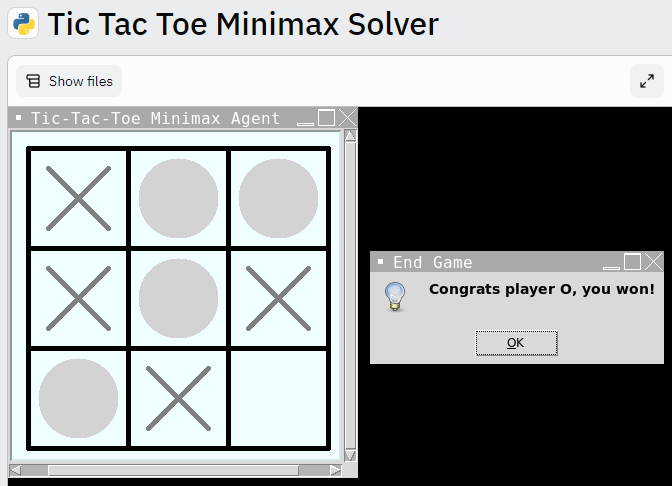

You are welcome to play there. If you won the game, please let me know: it means there is a bug in my program. 